In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [3]:
insurence_data = pd.read_csv('insurance.csv')

In [4]:
insurence_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurence_data.shape

(1338, 7)

In [6]:
insurence_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurence_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
insurence_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data Distribution colume wise

/tmp/ipykernel_225701/32934920.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurence_data['age'])


<function matplotlib.pyplot.show(close=None, block=None)>

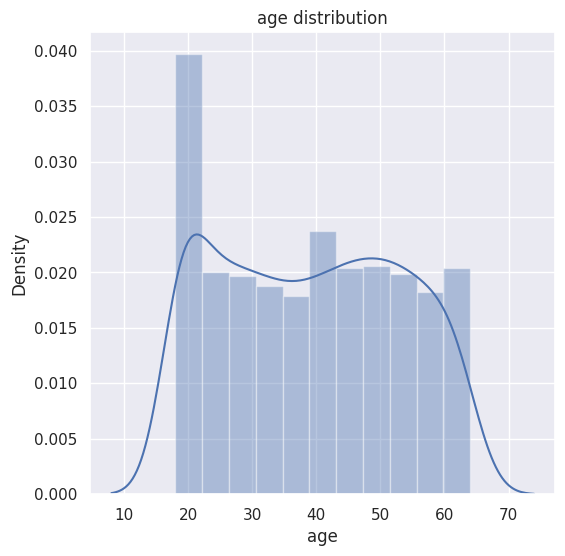

In [9]:
# for age as age is a numaric data we can use a distplot in sns
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurence_data['age'])
plt.title('age distribution')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

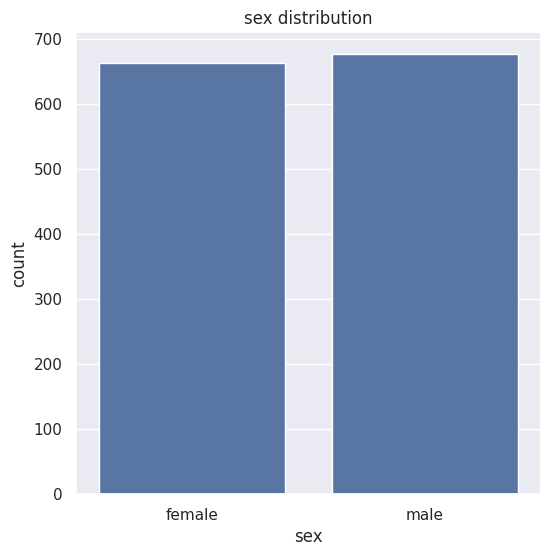

In [10]:
# for sex as sex is a catagorized data(means sex only has has the two property male & female) so here we can use countplot from sns
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurence_data)
plt.title('sex distribution')
plt.show

In [11]:
insurence_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

/tmp/ipykernel_225701/2604857335.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurence_data['bmi'])


<function matplotlib.pyplot.show(close=None, block=None)>

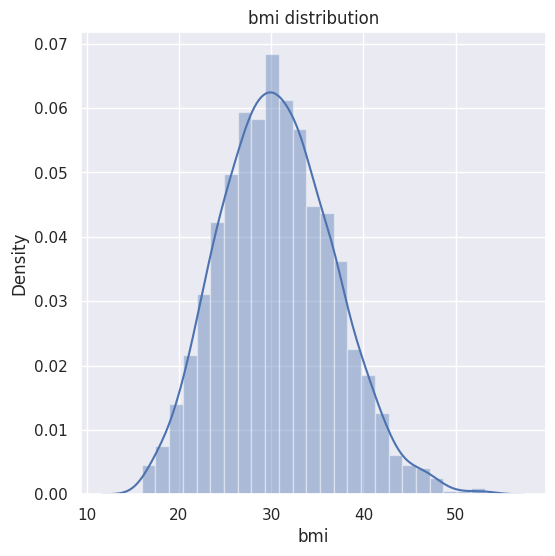

In [12]:
# for bmi as bmi is a numeric data we can use distplot form sns

plt.figure(figsize=(6,6))
sns.distplot(insurence_data['bmi'])
plt.title('bmi distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

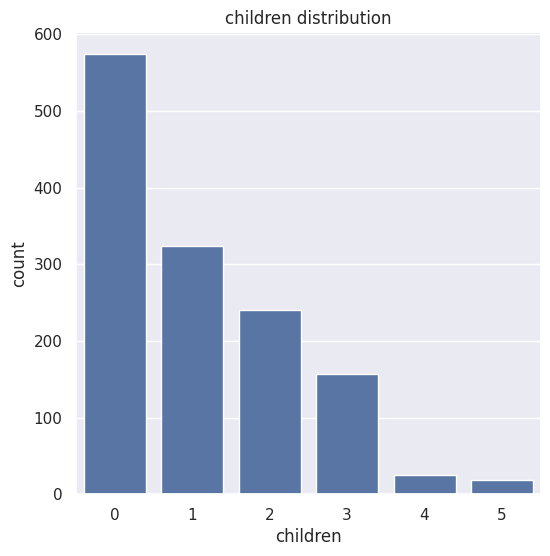

In [13]:
# for children as we can consider the them as catagorize because we can have max 5 to 6 childrens so we cn use countplot from sns
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurence_data) 
plt.title('children distribution')
plt.show

In [14]:
insurence_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

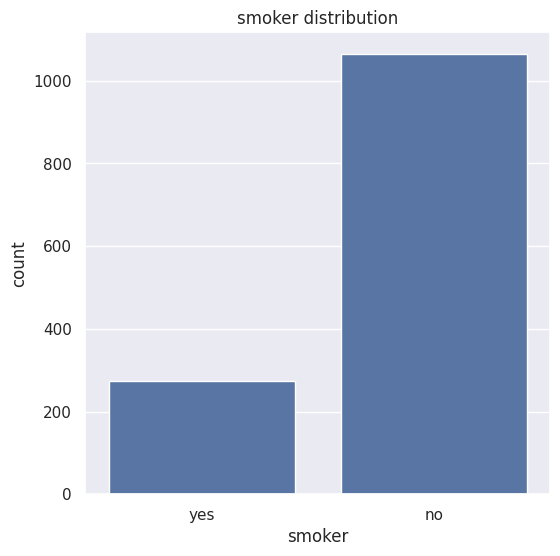

In [15]:
# for smokers use countplot
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurence_data) 
plt.title('smoker distribution')
plt.show

In [16]:
insurence_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

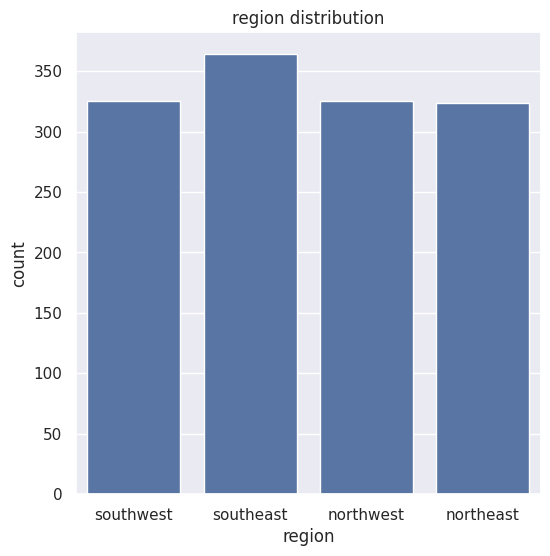

In [17]:
# for region use countplot
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurence_data) 
plt.title('region distribution')
plt.show

In [18]:
insurence_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### Data encoding 
#### as many data col in dataset are catoguric and in string format but computer undestand the numeric data well so in this part we can convert strings --> numeric data 
#### for eg we have male & female so what we can do male --> 0 & female --> 1

In [47]:
# encoding the sex col
insurence_data.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding the smoker col
insurence_data.replace({'smoker':{'yes':1, 'no':0}}, inplace=True)

# encoding the region col
insurence_data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3 }}, inplace=True)

### spliting the independent fetures & dependent feture/target put all independent fetures --> X & dependent feture/target --> Y

In [23]:
X = insurence_data.drop(columns='charges', axis=1)
Y = insurence_data['charges']

print(Y)
print(X)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


### spliting the data into training data and testing data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_test.shape, X_train.shape)

(1338, 6) (268, 6) (1070, 6)


In [29]:
print(Y.shape, Y_test.shape, Y_train.shape)

(1338,) (268,) (1070,)


### Model training

In [54]:
# loading the linear regration model
regressor = LinearRegression()

In [55]:
regressor.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Model Evaluatiom

In [33]:
# predection on training data
training_data_prediction = regressor.predict(X_train)

In [34]:
r2_train = metrics.r2_score(Y_train, training_data_prediction )
print('R Squ value', r2_train)

R Squ value 0.751505643411174


In [36]:
# predection on test data
test_data_prediction = regressor.predict(X_test)

In [37]:
r2_test = metrics.r2_score(Y_test, test_data_prediction )
print('R Squ value', r2_test)

R Squ value 0.7447273869684076


### building the predective system

In [57]:
input_data = (18,1,32.12,2,0,0)

# changing input data from tupal to numpy_array
input_data_numpy_array = np.asarray(input_data)

#reshaping the array
input_data_reshaped = input_data_numpy_array.reshape(1,-1)

predction = regressor.predict(input_data_reshaped)
print(predction)

print('The Insurance cost in USD', predction[0])


[27689.98831817]
The Insurance cost in USD 27689.988318165895


/home/chaitanya/Documents/medical_insurence_predection/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
